In [32]:
import pandas as pd
import numpy as np
import pybaseball as pyb
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt, atan2, degrees, pi
from scipy.stats import percentileofscore
import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

import matplotlib.pyplot as plt

# This line ensures that the plots are displayed within the notebook
%matplotlib inline

pd.set_option('display.max_rows', None)

In [33]:
import pandas as pd #use pandas for reading in the query
import pyodbc as odbc #this package is for the database driver
from pandasql import sqldf #this is optional

#Create python connection for SQL
cnxn_str = ('Driver=SQL Server; Server=OPSDBOAK85.oaklandathletics.com; Database=mlb_stats; trusted_connection=true')

cnxn = odbc.connect(cnxn_str) #reads in the connection 


cursor = cnxn.cursor()

query = """
SELECT 
    pe.PitcherId,
    pl.NamePlayer,
    pe.PitHand,
    p.x0,
    p.y0,
    p.z0,
    p.vx0,
    p.vy0,
    p.vz0,
    p.ax,
    p.ay,
    p.az,
    p.PitchType,
    p.StartSpeed,
    p.SpinRate,
    p.Extension,
    p.ReleaseX,
    p.ReleaseZ,
    p.ReleaseAngle,
    p.ReleaseDirection,
    p.pz,
    p.px,
    pl.NameParentTeam,
    v.URL
FROM 
    mlb_stats.dbo.pbp_play_event AS pe
LEFT JOIN 
    mlb_stats.dbo.pbp_play_event_pitch AS p
    ON p.GamePk = pe.GamePk 
    AND p.PlayId = pe.PlayId
LEFT JOIN 
    mlb_stats.dbo.pbp_game AS g
    ON g.GamePk = pe.GamePk
LEFT JOIN 
    mlb_stats.dbo.mlb_roster_status AS pl
    ON pl.PlayerID = pe.PitcherId
LEFT JOIN 
    mlb_stats.dbo.pbp_play_event_video AS v
    ON v.GamePk = pe.GamePk 
    AND v.PlayId = pe.PlayId
WHERE 
    pe.IsPitch = 1  
    AND p.PitchType = 'FA' 
    AND p.StartSpeed >= 80
    AND YEAR(g.GameDate) = 2024
    AND pl.NameParentTeam = 'Oakland Athletics'
    AND g.GameType = 'R'
	AND v.Source = 'BROADCAST'
"""

OAK_fastballs=pd.read_sql(query,cnxn) 

C:\Users\jreydel\AppData\Local\Temp\ipykernel_27560\3168884217.py:65: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  OAK_fastballs=pd.read_sql(query,cnxn)


In [34]:
import pandas as pd #use pandas for reading in the query
import pyodbc as odbc #this package is for the database driver
from pandasql import sqldf #this is optional

#Create python connection for SQL
cnxn_str = ('Driver=SQL Server; Server=OPSDBOAK85.oaklandathletics.com; Database=mlb_stats; trusted_connection=true')

cnxn = odbc.connect(cnxn_str) #reads in the connection 


cursor = cnxn.cursor()

query = """
SELECT 
    pe.[PitcherId],
	pl.NamePlayer,
    pe.[PitHand],
     p.[x0]
      ,p.[y0]
      ,p.[z0]
      ,p.[vx0]
      ,p.[vy0]
      ,p.[vz0]
      ,p.[ax]
      ,p.[ay]
      ,p.[az],
    p.PitchType,
    p.StartSpeed,
    p.SpinRate,
    p.Extension,
    p.ReleaseX,
    p.ReleaseZ,
    p.ReleaseAngle,
    p.ReleaseDirection,
    p.pz,
    p.px, 
    pl.NameParentTeam,
    v.URL
FROM 
    mlb_stats.dbo.pbp_play_event AS pe
LEFT JOIN 
    mlb_stats.dbo.pbp_play_event_pitch AS p
    ON p.GamePk = pe.GamePk 
    AND p.PlayId = pe.PlayId
LEFT JOIN 
    mlb_stats.dbo.pbp_game AS g
    ON g.GamePk = pe.GamePk
LEFT JOIN 
    mlb_stats.dbo.mlb_roster_status AS pl
    ON pl.PlayerID = pe.PitcherId
LEFT JOIN 
    mlb_stats.dbo.pbp_play_event_video AS v
    ON v.GamePk = pe.GamePk 
    AND v.PlayId = pe.PlayId
WHERE 
    pe.IsPitch = 1  
    AND p.PitchType = 'SI' 
    AND p.StartSpeed >= 80
    AND YEAR(g.GameDate) = 2024
    AND pl.NameParentTeam = 'Oakland Athletics'
    AND g.GameType = 'R'
	AND v.Source = 'BROADCAST'
"""

OAK_sinkers=pd.read_sql(query,cnxn) 

C:\Users\jreydel\AppData\Local\Temp\ipykernel_27560\3966991392.py:65: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  OAK_sinkers=pd.read_sql(query,cnxn)


In [35]:
import pandas as pd #use pandas for reading in the query
import pyodbc as odbc #this package is for the database driver
from pandasql import sqldf #this is optional

#Create python connection for SQL
cnxn_str = ('Driver=SQL Server; Server=OPSDBOAK85.oaklandathletics.com; Database=mlb_stats; trusted_connection=true')

cnxn = odbc.connect(cnxn_str) #reads in the connection 


cursor = cnxn.cursor()

query = """
SELECT 
    pe.[PitcherId],
	pl.NamePlayer,
    pe.[PitHand],
     p.[x0]
      ,p.[y0]
      ,p.[z0]
      ,p.[vx0]
      ,p.[vy0]
      ,p.[vz0]
      ,p.[ax]
      ,p.[ay]
      ,p.[az],
    p.PitchType,
    p.StartSpeed,
    p.SpinRate,
    p.Extension,
    p.ReleaseX,
    p.ReleaseZ,
    p.ReleaseAngle,
    p.ReleaseDirection,
    p.pz,
    p.px, 
    pl.NameParentTeam,
    v.URL
FROM 
    mlb_stats.dbo.pbp_play_event AS pe
LEFT JOIN 
    mlb_stats.dbo.pbp_play_event_pitch AS p
    ON p.GamePk = pe.GamePk 
    AND p.PlayId = pe.PlayId
LEFT JOIN 
    mlb_stats.dbo.pbp_game AS g
    ON g.GamePk = pe.GamePk
LEFT JOIN 
    mlb_stats.dbo.mlb_roster_status AS pl
    ON pl.PlayerID = pe.PitcherId
LEFT JOIN 
    mlb_stats.dbo.pbp_play_event_video AS v
    ON v.GamePk = pe.GamePk 
    AND v.PlayId = pe.PlayId
WHERE 
    pe.IsPitch = 1  
    AND p.PitchType = 'SL' 
    AND YEAR(g.GameDate) = 2024
    AND pl.NameParentTeam = 'Oakland Athletics'
    AND g.GameType = 'R'
	AND v.Source = 'BROADCAST'
"""

OAK_sliders=pd.read_sql(query,cnxn) 

C:\Users\jreydel\AppData\Local\Temp\ipykernel_27560\172693994.py:64: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  OAK_sliders=pd.read_sql(query,cnxn)


In [36]:
import pandas as pd #use pandas for reading in the query
import pyodbc as odbc #this package is for the database driver
from pandasql import sqldf #this is optional

#Create python connection for SQL
cnxn_str = ('Driver=SQL Server; Server=OPSDBOAK85.oaklandathletics.com; Database=mlb_stats; trusted_connection=true')

cnxn = odbc.connect(cnxn_str) #reads in the connection 


cursor = cnxn.cursor()

query = """
SELECT 
    pe.[PitcherId],
	pl.NamePlayer,
    pe.[PitHand],
     p.[x0]
      ,p.[y0]
      ,p.[z0]
      ,p.[vx0]
      ,p.[vy0]
      ,p.[vz0]
      ,p.[ax]
      ,p.[ay]
      ,p.[az],
    p.PitchType,
    p.StartSpeed,
    p.SpinRate,
    p.Extension,
    p.ReleaseX,
    p.ReleaseZ,
    p.ReleaseAngle,
    p.ReleaseDirection,
    p.pz,
    p.px, 
    pl.NameParentTeam,
    v.URL
FROM 
    mlb_stats.dbo.pbp_play_event AS pe
LEFT JOIN 
    mlb_stats.dbo.pbp_play_event_pitch AS p
    ON p.GamePk = pe.GamePk 
    AND p.PlayId = pe.PlayId
LEFT JOIN 
    mlb_stats.dbo.pbp_game AS g
    ON g.GamePk = pe.GamePk
LEFT JOIN 
    mlb_stats.dbo.mlb_roster_status AS pl
    ON pl.PlayerID = pe.PitcherId
LEFT JOIN 
    mlb_stats.dbo.pbp_play_event_video AS v
    ON v.GamePk = pe.GamePk 
    AND v.PlayId = pe.PlayId
WHERE 
    pe.IsPitch = 1  
    AND p.PitchType = 'CU' 
    AND YEAR(g.GameDate) = 2024
    AND pl.NameParentTeam = 'Oakland Athletics'
    AND g.GameType = 'R'
	AND v.Source = 'BROADCAST'
"""

OAK_curveballs=pd.read_sql(query,cnxn) 

C:\Users\jreydel\AppData\Local\Temp\ipykernel_27560\1462946972.py:64: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  OAK_curveballs=pd.read_sql(query,cnxn)


In [37]:
import pandas as pd #use pandas for reading in the query
import pyodbc as odbc #this package is for the database driver
from pandasql import sqldf #this is optional

#Create python connection for SQL
cnxn_str = ('Driver=SQL Server; Server=OPSDBOAK85.oaklandathletics.com; Database=mlb_stats; trusted_connection=true')

cnxn = odbc.connect(cnxn_str) #reads in the connection 


cursor = cnxn.cursor()

query = """
SELECT 
    pe.[PitcherId],
	pl.NamePlayer,
    pe.[PitHand],
     p.[x0]
      ,p.[y0]
      ,p.[z0]
      ,p.[vx0]
      ,p.[vy0]
      ,p.[vz0]
      ,p.[ax]
      ,p.[ay]
      ,p.[az],
    p.PitchType,
    p.StartSpeed,
    p.SpinRate,
    p.Extension,
    p.ReleaseX,
    p.ReleaseZ,
    p.ReleaseAngle,
    p.ReleaseDirection,
    p.pz,
    p.px, 
    pl.NameParentTeam,
    v.URL
FROM 
    mlb_stats.dbo.pbp_play_event AS pe
LEFT JOIN 
    mlb_stats.dbo.pbp_play_event_pitch AS p
    ON p.GamePk = pe.GamePk 
    AND p.PlayId = pe.PlayId
LEFT JOIN 
    mlb_stats.dbo.pbp_game AS g
    ON g.GamePk = pe.GamePk
LEFT JOIN 
    mlb_stats.dbo.mlb_roster_status AS pl
    ON pl.PlayerID = pe.PitcherId
LEFT JOIN 
    mlb_stats.dbo.pbp_play_event_video AS v
    ON v.GamePk = pe.GamePk 
    AND v.PlayId = pe.PlayId
WHERE 
    pe.IsPitch = 1  
    AND p.PitchType = 'SW' 
    AND YEAR(g.GameDate) = 2024
    AND pl.NameParentTeam = 'Oakland Athletics'
    AND g.GameType = 'R'
	AND v.Source = 'BROADCAST'
"""

OAK_sweepers=pd.read_sql(query,cnxn) 

C:\Users\jreydel\AppData\Local\Temp\ipykernel_27560\3552852020.py:64: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  OAK_sweepers=pd.read_sql(query,cnxn)


In [38]:
import pandas as pd #use pandas for reading in the query
import pyodbc as odbc #this package is for the database driver
from pandasql import sqldf #this is optional

#Create python connection for SQL
cnxn_str = ('Driver=SQL Server; Server=OPSDBOAK85.oaklandathletics.com; Database=mlb_stats; trusted_connection=true')

cnxn = odbc.connect(cnxn_str) #reads in the connection 


cursor = cnxn.cursor()

query = """
SELECT 
    pe.[PitcherId],
	pl.NamePlayer,
    pe.[PitHand],
     p.[x0]
      ,p.[y0]
      ,p.[z0]
      ,p.[vx0]
      ,p.[vy0]
      ,p.[vz0]
      ,p.[ax]
      ,p.[ay]
      ,p.[az],
    p.PitchType,
    p.StartSpeed,
    p.SpinRate,
    p.Extension,
    p.ReleaseX,
    p.ReleaseZ,
    p.ReleaseAngle,
    p.ReleaseDirection,
    p.pz,
    p.px, 
    pl.NameParentTeam,
    v.URL
FROM 
    mlb_stats.dbo.pbp_play_event AS pe
LEFT JOIN 
    mlb_stats.dbo.pbp_play_event_pitch AS p
    ON p.GamePk = pe.GamePk 
    AND p.PlayId = pe.PlayId
LEFT JOIN 
    mlb_stats.dbo.pbp_game AS g
    ON g.GamePk = pe.GamePk
LEFT JOIN 
    mlb_stats.dbo.mlb_roster_status AS pl
    ON pl.PlayerID = pe.PitcherId
LEFT JOIN 
    mlb_stats.dbo.pbp_play_event_video AS v
    ON v.GamePk = pe.GamePk 
    AND v.PlayId = pe.PlayId
WHERE 
    pe.IsPitch = 1  
    AND p.PitchType = 'CH' 
    AND YEAR(g.GameDate) = 2024
    AND pl.NameParentTeam = 'Oakland Athletics'
    AND g.GameType = 'R'
	AND v.Source = 'BROADCAST'
"""

OAK_CH=pd.read_sql(query,cnxn) 

C:\Users\jreydel\AppData\Local\Temp\ipykernel_27560\3484185162.py:64: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  OAK_CH=pd.read_sql(query,cnxn)


In [39]:
import pandas as pd #use pandas for reading in the query
import pyodbc as odbc #this package is for the database driver
from pandasql import sqldf #this is optional

#Create python connection for SQL
cnxn_str = ('Driver=SQL Server; Server=OPSDBOAK85.oaklandathletics.com; Database=mlb_stats; trusted_connection=true')

cnxn = odbc.connect(cnxn_str) #reads in the connection 


cursor = cnxn.cursor()

query = """
SELECT 
    pe.[PitcherId],
	pl.NamePlayer,
    pe.[PitHand],
     p.[x0]
      ,p.[y0]
      ,p.[z0]
      ,p.[vx0]
      ,p.[vy0]
      ,p.[vz0]
      ,p.[ax]
      ,p.[ay]
      ,p.[az],
    p.PitchType,
    p.StartSpeed,
    p.SpinRate,
    p.Extension,
    p.ReleaseX,
    p.ReleaseZ,
    p.ReleaseAngle,
    p.ReleaseDirection,
    p.pz,
    p.px, 
    pl.NameParentTeam,
    v.URL
FROM 
    mlb_stats.dbo.pbp_play_event AS pe
LEFT JOIN 
    mlb_stats.dbo.pbp_play_event_pitch AS p
    ON p.GamePk = pe.GamePk 
    AND p.PlayId = pe.PlayId
LEFT JOIN 
    mlb_stats.dbo.pbp_game AS g
    ON g.GamePk = pe.GamePk
LEFT JOIN 
    mlb_stats.dbo.mlb_roster_status AS pl
    ON pl.PlayerID = pe.PitcherId
LEFT JOIN 
    mlb_stats.dbo.pbp_play_event_video AS v
    ON v.GamePk = pe.GamePk 
    AND v.PlayId = pe.PlayId
WHERE 
    pe.IsPitch = 1  
    AND p.PitchType = 'FC' 
    AND p.StartSpeed >= 80
    AND YEAR(g.GameDate) = 2024
    AND pl.NameParentTeam = 'Oakland Athletics'
    AND g.GameType = 'R'
	AND v.Source = 'BROADCAST'
"""

OAK_cutters=pd.read_sql(query,cnxn) 

C:\Users\jreydel\AppData\Local\Temp\ipykernel_27560\3640716187.py:65: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  OAK_cutters=pd.read_sql(query,cnxn)


In [40]:
def calculate_vaa(row):
    yf = 17/12  # Home plate distance in feet, converted to inches
    ay = row['ay']  # Acceleration in y-dimension for the current pitch
    vy0 = row['vy0']  # Velocity in y-dimension at y=50 feet for the current pitch
    vz0 = row['vz0']  # Velocity in z-dimension at y=50 feet for the current pitch
    az = row['az']  # Acceleration in z-dimension for the current pitch

    vy_f = -sqrt(vy0**2 - (2 * ay * (50 - yf)))
    t = (vy_f - vy0) / ay
    vz_f = vz0 + (az * t)
    vaa_rad = atan2(vz_f, vy_f)
    vaa_deg = (180+degrees(vaa_rad))*-1
    return vaa_deg

In [41]:
def calculate_VRA(vy0, ay, release_extension, vz0, az):
    vy_s = -np.sqrt(vy0**2 - 2 * ay * (60.5 - release_extension - 50))
    t_s = (vy_s - vy0) / ay
    vz_s = vz0 - az * t_s
    VRA = -np.arctan(vz_s / vy_s) * (180 / np.pi)
    return VRA

def calculate_HRA(vy0, ay, release_extension, vx0, ax):
    vy_s = -np.sqrt(vy0**2 - 2 * ay * (60.5 - release_extension - 50))
    t_s = (vy_s - vy0) / ay
    vx_s = vx0 - ax * t_s
    HRA = -np.arctan(vx_s / vy_s) * (180 / np.pi)
    return HRA

In [42]:
OAK_fastballs['VAA'] = OAK_fastballs.apply(calculate_vaa, axis=1)

OAK_fastballs['VRA'] = OAK_fastballs.apply(lambda x: calculate_VRA(x['vy0'], x['ay'], x['Extension'], x['vz0'], x['az']), axis=1)
OAK_fastballs['HRA'] = OAK_fastballs.apply(lambda x: calculate_HRA(x['vy0'], x['ay'], x['Extension'], x['vx0'], x['ax']), axis=1)

pitch_count = OAK_fastballs['NamePlayer'].value_counts()

OAK_fastballs_filtered = OAK_fastballs[OAK_fastballs['NamePlayer'].isin(pitch_count.index[pitch_count >= 200])]

In [43]:
OAK_sinkers['VAA'] = OAK_sinkers.apply(calculate_vaa, axis=1)

OAK_sinkers['VRA'] = OAK_sinkers.apply(lambda x: calculate_VRA(x['vy0'], x['ay'], x['Extension'], x['vz0'], x['az']), axis=1)
OAK_sinkers['HRA'] = OAK_sinkers.apply(lambda x: calculate_HRA(x['vy0'], x['ay'], x['Extension'], x['vx0'], x['ax']), axis=1)

pitch_count = OAK_sinkers['NamePlayer'].value_counts()

OAK_sinkers_filtered = OAK_sinkers[OAK_sinkers['NamePlayer'].isin(pitch_count.index[pitch_count >= 150])]

In [51]:
OAK_sliders['VAA'] = OAK_sliders.apply(calculate_vaa, axis=1)

OAK_sliders['VRA'] = OAK_sliders.apply(lambda x: calculate_VRA(x['vy0'], x['ay'], x['Extension'], x['vz0'], x['az']), axis=1)
OAK_sliders['HRA'] = OAK_sliders.apply(lambda x: calculate_HRA(x['vy0'], x['ay'], x['Extension'], x['vx0'], x['ax']), axis=1)

pitch_count = OAK_sliders['NamePlayer'].value_counts()

OAK_sliders_filtered = OAK_sliders[OAK_sliders['NamePlayer'].isin(pitch_count.index[pitch_count >= 50])]

In [45]:
OAK_curveballs['VAA'] = OAK_curveballs.apply(calculate_vaa, axis=1)

OAK_curveballs['VRA'] = OAK_curveballs.apply(lambda x: calculate_VRA(x['vy0'], x['ay'], x['Extension'], x['vz0'], x['az']), axis=1)
OAK_curveballs['HRA'] = OAK_curveballs.apply(lambda x: calculate_HRA(x['vy0'], x['ay'], x['Extension'], x['vx0'], x['ax']), axis=1)

pitch_count = OAK_curveballs['NamePlayer'].value_counts()
OAK_curveballs_filtered = OAK_curveballs[OAK_curveballs['NamePlayer'].isin(pitch_count.index[pitch_count >= 100])]

In [52]:
OAK_cutters['VAA'] = OAK_cutters.apply(calculate_vaa, axis=1)

OAK_cutters['VRA'] = OAK_cutters.apply(lambda x: calculate_VRA(x['vy0'], x['ay'], x['Extension'], x['vz0'], x['az']), axis=1)
OAK_cutters['HRA'] = OAK_cutters.apply(lambda x: calculate_HRA(x['vy0'], x['ay'], x['Extension'], x['vx0'], x['ax']), axis=1)

pitch_count = OAK_cutters['NamePlayer'].value_counts()
OAK_cutters_filtered = OAK_cutters[OAK_cutters['NamePlayer'].isin(pitch_count.index[pitch_count >= 100])]

In [46]:
import pandas as pd #use pandas for reading in the query
import pyodbc as odbc #this package is for the database driver
from pandasql import sqldf #this is optional

#Create python connection for SQL
cnxn_str = ('Driver=SQL Server; Server=OPSDBOAK85.oaklandathletics.com; Database=mlb_stats; trusted_connection=true')

cnxn = odbc.connect(cnxn_str) #reads in the connection 


cursor = cnxn.cursor()

query_complfb = """
SELECT [Name]
      ,[PlayerID]
      ,[Throws]
      ,[Level]
      ,[LeagueLevel]
      ,[Season]
      ,[SplitType]
      ,[PitchType]
      ,[TP]
      ,[Usage]
      ,[VeloAvg]
      ,[VeloMin]
      ,[VeloMax]
      ,[wAVG]
      ,[StrikeRate]
      ,[CalledStrikeRate]
      ,[InZone]
      ,[SwingRate]
      ,[Whiff]
      ,[InZoneWhiff]
      ,[OutZoneSwing]
      ,[HorzBreak]
      ,[VertIndBreak]
      ,[VAA]
      ,[Extension]
      ,[SpinRate]
      ,[SpinAxis]
      ,[SpinEff]
      ,[Tilt]
      ,[ReleaseX]
      ,[ReleaseZ]
      ,[ZValExp]
      ,[ZValObs]
      ,[StuffGrade]
      ,[StuffGradeSwing]
      ,[StuffPlus]
      ,[CommandPlus]
      ,[GBPer]
      ,[PUPer]
      ,[HitSpeedCt]
      ,[HitSpeed]
      ,[HitAngleV]
      ,[FirstGame]
      ,[LastGame]
      ,[UpdatedDate]
  FROM [mlb_stats].[dbo].[stat_pitcher_pitch]
  WHERE Season = 2024 AND PitchType = 'FA' AND SplitType = 'All' AND TP >= 75 AND CommandPlus IS NOT NULL
"""

OAK_Fastball_Command=pd.read_sql(query_complfb,cnxn) 

print(OAK_Fastball_Command)

C:\Users\jreydel\AppData\Local\Temp\ipykernel_27560\1501316735.py:63: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  OAK_Fastball_Command=pd.read_sql(query_complfb,cnxn)


                           Name  PlayerID Throws Level  LeagueLevel  Season  \
0             Verlander, Justin    434378      R   MLB            1    2024   
1               Morton, Charlie    450203      R   MLB            1    2024   
2                 Scherzer, Max    453286      R   AAA            2    2024   
3                 Scherzer, Max    453286      R   MLB            1    2024   
4                 Martin, Chris    455119      R   MLB            1    2024   
5                 Cueto, Johnny    456501      R   AAA            2    2024   
6                Wilson, Justin    458677      L   MLB            1    2024   
7                   Lynn, Lance    458681      R   MLB            1    2024   
8              Carrasco, Carlos    471911      R   MLB            1    2024   
9              Kershaw, Clayton    477132      L   MLB            1    2024   
10                 Yates, Kirby    489446      R   MLB            1    2024   
11               Quintana, Jose    500779      L   M

In [47]:
OAK_filtered_fastball_command = OAK_Fastball_Command.loc[:, ['PlayerID', 'StrikeRate', 'CalledStrikeRate', 'Whiff', 'InZone', 'SwingRate', 'OutZoneSwing','InZoneWhiff']]
OAK_full_fb_command = pd.merge(OAK_fastballs_filtered, OAK_filtered_fastball_command, how='left', left_on='PitcherId', right_on='PlayerID')
OAK_full_fb_command_unique = OAK_full_fb_command.drop_duplicates(subset=['NamePlayer'])

from IPython.display import display

display(OAK_full_fb_command_unique)

,PitcherId,NamePlayer,PitHand,x0,y0,z0,vx0,vy0,vz0,ax,...,VRA,HRA,PlayerID,StrikeRate,CalledStrikeRate,Whiff,InZone,SwingRate,OutZoneSwing,InZoneWhiff
0,676664,JP Sears,L,0.940807,50.002766,5.003750,-4.063036,-133.817666,-0.096761,13.222582,...,0.173252,-1.928424,676664,0.645288,0.112565,0.282555,0.473822,0.532723,0.305970,0.235915
76,671305,Michel Otañez,R,-1.833144,50.002898,5.396848,6.778572,-141.461789,-3.226913,-12.604006,...,-1.185272,2.914710,671305,0.634868,0.171053,0.283688,0.467105,0.463816,0.283951,0.242105
86,695243,Mason Miller,R,-1.917228,50.002413,5.833610,7.915211,-140.278650,-8.704714,-9.168878,...,-3.447098,3.349984,695243,0.698901,0.156044,0.400810,0.529670,0.542857,0.383178,0.363636
88,656232,Brandon Bielak,R,-0.861096,50.005250,5.989304,2.564999,-135.157069,-7.831949,-7.027955,...,-3.127274,1.204908,656232,0.643216,0.193467,0.178771,0.462312,0.449749,0.299065,0.121739
100,674370,Osvaldo Bido,R,-2.023249,50.006220,5.582846,7.372730,-136.898867,-5.457978,-12.875402,...,-2.074350,3.278469,674370,0.630952,0.174603,0.234783,0.484127,0.456349,0.261538,0.209877
270,621053,Tyler Ferguson,R,-2.806571,50.001924,5.575566,11.829455,-140.027173,-6.423280,-17.794647,...,-2.453062,5.102696,621053,0.717391,0.152174,0.397436,0.507246,0.565217,0.397059,0.333333
320,548389,Ross Stripling,R,-0.776781,50.006151,6.677637,5.635006,-131.856761,-7.503184,-4.720435,...,-3.065173,2.536853,548389,0.629526,0.200557,0.168831,0.417827,0.428969,0.296651,0.152174
342,613534,Austin Adams,R,-2.433072,50.002254,5.033177,9.499777,-134.144273,-3.073675,-10.748478,...,-1.008490,4.235148,613534,0.582011,0.211640,0.242857,0.476190,0.370370,0.151515,0.200000
372,666204,Dany Jiménez,R,-0.670444,50.001451,6.050760,2.598314,-133.507378,-7.855534,-7.161992,...,-3.168462,1.234251,666204,0.500000,0.188889,0.142857,0.377778,0.311111,0.178571,0.055556
466,547184,Michael Kelly,R,-1.293829,50.003482,5.895787,4.874178,-141.032999,-4.185974,-10.823118,...,-1.501068,2.129789,547184,0.593333,0.193333,0.233333,0.413333,0.400000,0.238636,0.153846


In [48]:
import pandas as pd #use pandas for reading in the query
import pyodbc as odbc #this package is for the database driver
from pandasql import sqldf #this is optional

#Create python connection for SQL
cnxn_str = ('Driver=SQL Server; Server=OPSDBOAK85.oaklandathletics.com; Database=mlb_stats; trusted_connection=true')

cnxn = odbc.connect(cnxn_str) #reads in the connection 


cursor = cnxn.cursor()

query_complsl = """
SELECT [Name]
      ,[PlayerID]
      ,[Throws]
      ,[Level]
      ,[LeagueLevel]
      ,[Season]
      ,[SplitType]
      ,[PitchType]
      ,[TP]
      ,[Usage]
      ,[VeloAvg]
      ,[VeloMin]
      ,[VeloMax]
      ,[wAVG]
      ,[StrikeRate]
      ,[CalledStrikeRate]
      ,[InZone]
      ,[SwingRate]
      ,[Whiff]
      ,[InZoneWhiff]
      ,[OutZoneSwing]
      ,[HorzBreak]
      ,[VertIndBreak]
      ,[VAA]
      ,[Extension]
      ,[SpinRate]
      ,[SpinAxis]
      ,[SpinEff]
      ,[Tilt]
      ,[ReleaseX]
      ,[ReleaseZ]
      ,[ZValExp]
      ,[ZValObs]
      ,[StuffGrade]
      ,[StuffGradeSwing]
      ,[StuffPlus]
      ,[CommandPlus]
      ,[GBPer]
      ,[PUPer]
      ,[HitSpeedCt]
      ,[HitSpeed]
      ,[HitAngleV]
      ,[FirstGame]
      ,[LastGame]
      ,[UpdatedDate]
  FROM [mlb_stats].[dbo].[stat_pitcher_pitch]
  WHERE Season = 2024 AND PitchType = 'SL' AND SplitType = 'All' AND TP >= 75 AND CommandPlus IS NOT NULL
"""

OAK_SLiders_Command=pd.read_sql(query_complsl,cnxn) 

print(OAK_SLiders_Command)

C:\Users\jreydel\AppData\Local\Temp\ipykernel_27560\145609674.py:63: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  OAK_SLiders_Command=pd.read_sql(query_complsl,cnxn)


                           Name  PlayerID Throws Level  LeagueLevel  Season  \
0             Verlander, Justin    434378      R   MLB            1    2024   
1               Morton, Charlie    450203      R   MLB            1    2024   
2                 Scherzer, Max    453286      R   MLB            1    2024   
3                 Cueto, Johnny    456501      R   AAA            2    2024   
4                Wilson, Justin    458677      L   MLB            1    2024   
5              Carrasco, Carlos    471911      R   MLB            1    2024   
6                  García, Luis    472610      R   MLB            1    2024   
7              Kershaw, Clayton    477132      L   MLB            1    2024   
8                 Peralta, Wily    503449      R   AAA            2    2024   
9                   Darvish, Yu    506433      R   MLB            1    2024   
10             Alexander, Scott    518397      L   MLB            1    2024   
11               Cruz, Fernando    518585      R   M

In [49]:
OAK_filtered_slider_command = OAK_SLiders_Command.loc[:, ['PlayerID', 'StrikeRate', 'CalledStrikeRate', 'Whiff', 'InZone', 'SwingRate', 'OutZoneSwing','InZoneWhiff', 'StuffPlus']]
OAK_full_sl_command = pd.merge(OAK_sliders_filtered, OAK_filtered_slider_command, how='left', left_on='PitcherId', right_on='PlayerID')
OAK_full_sl_command_unique = OAK_full_sl_command.drop_duplicates(subset=['NamePlayer'])

from IPython.display import display

display(OAK_full_sl_command_unique)

,PitcherId,NamePlayer,PitHand,x0,y0,z0,vx0,vy0,vz0,ax,...,HRA,PlayerID,StrikeRate,CalledStrikeRate,Whiff,InZone,SwingRate,OutZoneSwing,InZoneWhiff,StuffPlus
0,548389,Ross Stripling,R,-1.011329,50.004125,6.830605,2.459153,-123.257771,-5.003306,1.629116,...,1.122290,548389.0,0.664671,0.077844,0.132653,0.443114,0.586826,0.387097,0.048387,35.0
6,666204,Dany Jiménez,R,-0.433640,50.003218,6.178151,0.509883,-119.495570,-4.904574,-2.200910,...,0.289546,666204.0,0.618644,0.203390,0.571429,0.415254,0.415254,0.275362,0.466667,60.0
18,518397,Scott Alexander,L,1.264235,50.000759,5.550408,-2.564937,-121.529672,-1.495158,-3.440389,...,-1.159411,518397.0,0.623529,0.223529,0.323529,0.435294,0.400000,0.312500,0.210526,50.0
22,613534,Austin Adams,R,-3.152362,50.005094,4.986540,7.228058,-127.157424,-2.727017,10.657438,...,3.095668,613534.0,0.611111,0.178451,0.392996,0.427609,0.432660,0.279412,0.277778,55.0
26,622072,Alex Wood,L,1.748704,50.005325,4.633305,-8.547008,-119.747786,-1.488037,-4.159761,...,-4.039935,622072.0,0.510549,0.232068,0.287879,0.362869,0.278481,0.185430,0.052632,40.0
58,663687,Hogan Harris,L,2.986510,50.001337,5.518284,-4.159002,-114.550961,-1.825466,-9.552244,...,-1.932348,663687.0,0.752941,0.094118,0.214286,0.435294,0.658824,0.541667,0.166667,45.0
763,672552,Jack O'Loughlin,L,1.233831,50.003261,5.612110,-2.778732,-119.570955,-3.794749,-1.590489,...,-1.313316,672552.0,0.634043,0.148936,0.298246,0.451064,0.485106,0.302326,0.213333,35.0
1771,683155,Joey Estes,R,-1.570389,50.000289,5.608656,5.511284,-121.290475,-7.318075,2.987783,...,2.568972,683155.0,0.693989,0.114754,0.235849,0.535519,0.579235,0.329412,0.141026,45.0
1783,666205,Kyle Muller,L,1.294137,50.002734,6.365192,-2.310683,-124.624413,-2.043705,-0.047885,...,-1.067340,666205.0,0.715190,0.132911,0.228261,0.550633,0.582278,0.380282,0.138462,45.0
1787,671305,Michel Otañez,R,-1.794058,50.002473,5.567968,3.305368,-123.830257,-3.663285,4.223682,...,1.471083,671305.0,0.552174,0.156522,0.538462,0.343478,0.395652,0.304636,0.333333,60.0


In [61]:
import pandas as pd
import numpy as np
from scipy.stats import gaussian_kde

# Ensure no missing values in the HRA columns of both datasets
filtered_ff_filtered_HRA = OAK_fastballs_filtered.dropna(subset=['HRA'])
filtered_sl_filtered_HRA = OAK_sliders_filtered.dropna(subset=['HRA'])

# Function to calculate the percentage overlap between two distributions
def calculate_overlap(hra_ff, hra_sl):
    kde_ff = gaussian_kde(hra_ff, bw_method='scott')
    kde_sl = gaussian_kde(hra_sl, bw_method='scott')

    x_min = min(hra_ff.min(), hra_sl.min())
    x_max = max(hra_ff.max(), hra_sl.max())
    x_values = np.linspace(x_min, x_max, 1000)

    pdf_ff = kde_ff(x_values)
    pdf_sl = kde_sl(x_values)

    overlap = np.minimum(pdf_ff, pdf_sl)
    overlap_area = np.trapz(overlap, x_values)

    total_area_ff = np.trapz(pdf_ff, x_values)
    total_area_sl = np.trapz(pdf_sl, x_values)
    percentage_overlap = (overlap_area / min(total_area_ff, total_area_sl)) * 100

    return percentage_overlap

# Get unique players
unique_pitchers = set(filtered_ff_filtered_HRA['NamePlayer']).intersection(filtered_sl_filtered_HRA['NamePlayer'])

# Calculate overlap for each player
overlap_results = []

for player in unique_pitchers:
    hra_ff = filtered_ff_filtered_HRA[filtered_ff_filtered_HRA['NamePlayer'] == player]['HRA']
    hra_sl = filtered_sl_filtered_HRA[filtered_sl_filtered_HRA['NamePlayer'] == player]['HRA']
    
    if len(hra_ff) > 0 and len(hra_sl) > 0:
        overlap_percentage = calculate_overlap(hra_ff, hra_sl)
        overlap_results.append({'NamePlayer': player, 'overlap_percentage': overlap_percentage})

# Create a DataFrame with the results
overlap_df = pd.DataFrame(overlap_results)

# Order the results from highest to lowest overlap percentage
overlap_sl_sorted = overlap_df.sort_values(by='overlap_percentage', ascending=False)

# Display the sorted results
display(overlap_sl_sorted)

,NamePlayer,overlap_percentage
44,Royber Salinas,92.194180
23,Will Klein,90.505831
5,Yunior Tur,89.214975
32,Pedro Santos,89.060722
24,Eduardo Rivera,88.899865
20,Kyle Muller,88.822647
11,Kade Morris,86.445952
15,Chase Cohen,86.318085
43,Shohei Tomioka,86.204357
3,Hunter Breault,85.713507


c:\Users\jreydel\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\jreydel\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


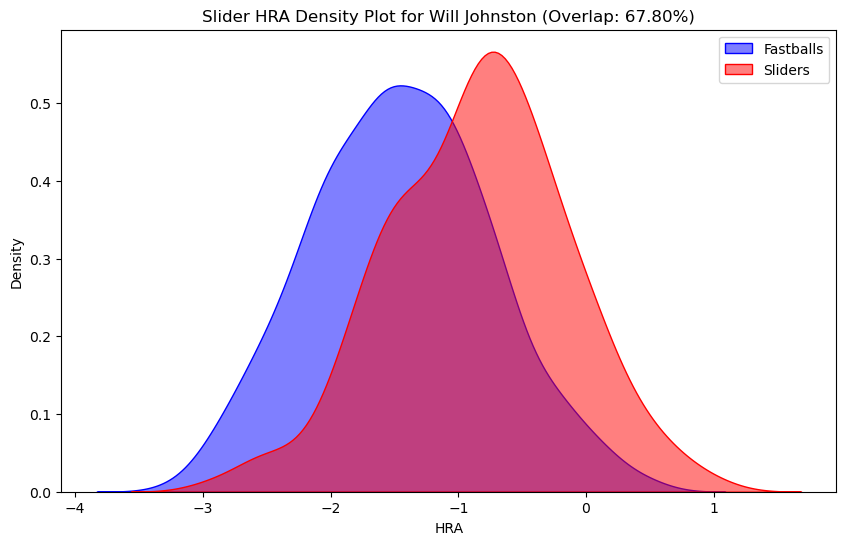

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_density_for_player(player_name, filtered_ff_filtered_HRA, filtered_sl_filtered_HRA, overlap_df):
    # Filter the data for the selected player
    hra_ff = filtered_ff_filtered_HRA[filtered_ff_filtered_HRA['NamePlayer'] == player_name]['HRA']
    hra_sl = filtered_sl_filtered_HRA[filtered_sl_filtered_HRA['NamePlayer'] == player_name]['HRA']
    
    # Get the overlap percentage for the player
    overlap_percentage = overlap_df[overlap_df['NamePlayer'] == player_name]['overlap_percentage'].values[0]
    
    # Check if there are enough data points
    if len(hra_ff) > 0 and len(hra_sl) > 0:
        # Create a density plot
        plt.figure(figsize=(10, 6))
        sns.kdeplot(hra_ff, label='Fastballs', bw_method='scott', fill=True, color='blue', alpha=0.5)
        sns.kdeplot(hra_sl, label='Sliders', bw_method='scott', fill=True, color='red', alpha=0.5)
        
        plt.title(f'Slider HRA Density Plot for {player_name} (Overlap: {overlap_percentage:.2f}%)')
        plt.xlabel('HRA')
        plt.ylabel('Density')
        plt.legend()
        plt.show()
    else:
        print(f'Not enough data points for player {player_name} to create a density plot.')

# Example usage:
# Replace 'YourPlayerName' with the actual name of the player you want to plot
plot_density_for_player('Will Johnston', filtered_ff_filtered_HRA, filtered_sl_filtered_HRA, overlap_df)


In [55]:
import pandas as pd
import numpy as np
from scipy.stats import gaussian_kde

# Ensure no missing values in the HRA columns of both datasets
filtered_ff_filtered_HRA = OAK_fastballs_filtered.dropna(subset=['HRA'])
filtered_ct_filtered_HRA = OAK_cutters_filtered.dropna(subset=['HRA'])

# Function to calculate the percentage overlap between two distributions
def calculate_overlap(hra_ff, hra_sl):
    kde_ff = gaussian_kde(hra_ff, bw_method='scott')
    kde_sl = gaussian_kde(hra_sl, bw_method='scott')

    x_min = min(hra_ff.min(), hra_sl.min())
    x_max = max(hra_ff.max(), hra_sl.max())
    x_values = np.linspace(x_min, x_max, 1000)

    pdf_ff = kde_ff(x_values)
    pdf_sl = kde_sl(x_values)

    overlap = np.minimum(pdf_ff, pdf_sl)
    overlap_area = np.trapz(overlap, x_values)

    total_area_ff = np.trapz(pdf_ff, x_values)
    total_area_sl = np.trapz(pdf_sl, x_values)
    percentage_overlap = (overlap_area / min(total_area_ff, total_area_sl)) * 100

    return percentage_overlap

# Get unique players
unique_pitchers = set(filtered_ff_filtered_HRA['NamePlayer']).intersection(filtered_ct_filtered_HRA['NamePlayer'])

# Calculate overlap for each player
overlap_results = []

for player in unique_pitchers:
    hra_ff = filtered_ff_filtered_HRA[filtered_ff_filtered_HRA['NamePlayer'] == player]['HRA']
    hra_sl = filtered_ct_filtered_HRA[filtered_ct_filtered_HRA['NamePlayer'] == player]['HRA']
    
    if len(hra_ff) > 0 and len(hra_sl) > 0:
        overlap_percentage = calculate_overlap(hra_ff, hra_sl)
        overlap_results.append({'NamePlayer': player, 'overlap_percentage': overlap_percentage})

# Create a DataFrame with the results
overlap_df = pd.DataFrame(overlap_results)

# Order the results from highest to lowest overlap percentage
overlap_ct_sorted = overlap_df.sort_values(by='overlap_percentage', ascending=False)

# Display the sorted results
display(overlap_ct_sorted)

,NamePlayer,overlap_percentage
5,Mark Adamiak,93.893881
4,James Gonzalez,93.132063
9,Pedro Santos,93.033240
13,Dylan Hall,92.215196
0,Ross Stripling,85.700195
11,Brady Basso,83.617651
3,Mitch Myers,81.045456
8,Gunnar Hoglund,78.094712
14,Michael Kelly,77.119491
1,Tyler Ferguson,76.001996


c:\Users\jreydel\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\jreydel\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


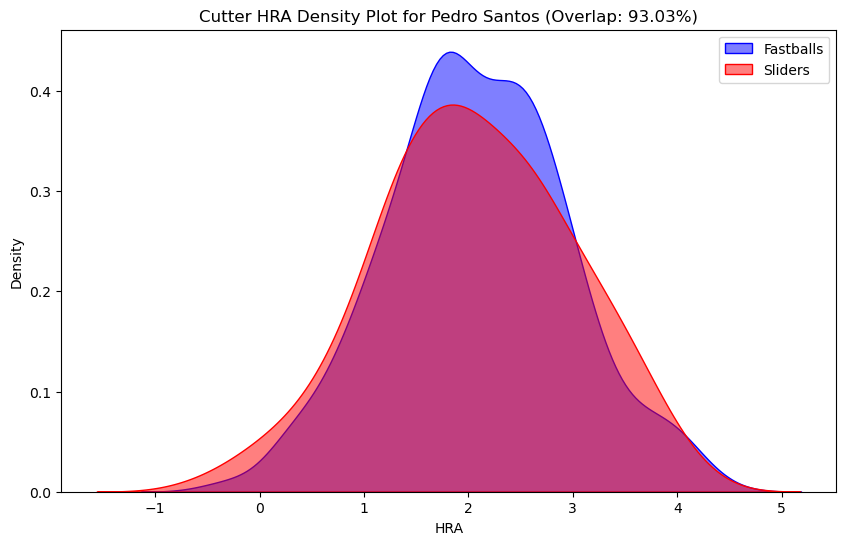

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_density_for_player(player_name, filtered_ff_filtered_HRA, filtered_ct_filtered_HRA, overlap_df):
    # Filter the data for the selected player
    hra_ff = filtered_ff_filtered_HRA[filtered_ff_filtered_HRA['NamePlayer'] == player_name]['HRA']
    hra_sl = filtered_ct_filtered_HRA[filtered_ct_filtered_HRA['NamePlayer'] == player_name]['HRA']
    
    # Get the overlap percentage for the player
    overlap_percentage = overlap_df[overlap_df['NamePlayer'] == player_name]['overlap_percentage'].values[0]
    
    # Check if there are enough data points
    if len(hra_ff) > 0 and len(hra_sl) > 0:
        # Create a density plot
        plt.figure(figsize=(10, 6))
        sns.kdeplot(hra_ff, label='Fastballs', bw_method='scott', fill=True, color='blue', alpha=0.5)
        sns.kdeplot(hra_sl, label='Sliders', bw_method='scott', fill=True, color='red', alpha=0.5)
        
        plt.title(f'Cutter HRA Density Plot for {player_name} (Overlap: {overlap_percentage:.2f}%)')
        plt.xlabel('HRA')
        plt.ylabel('Density')
        plt.legend()
        plt.show()
    else:
        print(f'Not enough data points for player {player_name} to create a density plot.')

# Example usage:
# Replace 'YourPlayerName' with the actual name of the player you want to plot
plot_density_for_player('Pedro Santos', filtered_ff_filtered_HRA, filtered_ct_filtered_HRA, overlap_df)


In [20]:
merged_results = pd.merge(OAK_full_sl_command_unique, overlap_sl_sorted, on='NamePlayer')

# Drop rows where StuffPlus is NA
merged_results = merged_results.dropna(subset=['StuffPlus'])
display(merged_results)

,PitcherId,NamePlayer,PitHand,x0,y0,z0,vx0,vy0,vz0,ax,...,PlayerID,StrikeRate,CalledStrikeRate,Whiff,InZone,SwingRate,OutZoneSwing,InZoneWhiff,StuffPlus,overlap_percentage
0,613534,Austin Adams,R,-3.371485,50.002668,5.192342,5.894494,-128.301289,1.373986,10.059756,...,613534,0.611111,0.178451,0.392996,0.427609,0.432660,0.279412,0.277778,55,63.291076
1,548389,Ross Stripling,R,-0.944713,50.002252,6.668847,1.257657,-122.785369,-8.314014,-0.431750,...,548389,0.664671,0.077844,0.132653,0.443114,0.586826,0.387097,0.048387,35,69.898045
2,666204,Dany Jiménez,R,-0.433640,50.003218,6.178151,0.509883,-119.495570,-4.904574,-2.200910,...,666204,0.618644,0.203390,0.571429,0.415254,0.415254,0.275362,0.466667,60,75.911396
3,663687,Hogan Harris,L,2.778372,50.003153,5.832085,-2.587771,-113.639346,2.772371,-9.259953,...,663687,0.743902,0.097561,0.207547,0.439024,0.646341,0.521739,0.172414,45,41.176520
4,672552,Jack O'Loughlin,L,1.156594,50.002136,5.780518,-4.060405,-122.788545,-1.992651,-0.270299,...,672552,0.638767,0.149780,0.297297,0.453744,0.488987,0.306452,0.205479,35,59.132602
5,671305,Michel Otañez,R,-1.542967,50.000559,5.486779,5.059169,-123.844575,-6.447453,2.456682,...,671305,0.552174,0.156522,0.538462,0.343478,0.395652,0.304636,0.333333,60,51.921179
6,683155,Joey Estes,R,-1.712787,50.000503,5.899074,2.594439,-120.056657,-1.433459,3.191150,...,683155,0.696429,0.119048,0.226804,0.529762,0.577381,0.341772,0.114286,45,46.969610
7,666205,Kyle Muller,L,1.294137,50.002734,6.365192,-2.310683,-124.624413,-2.043705,-0.047885,...,666205,0.715190,0.132911,0.228261,0.550633,0.582278,0.380282,0.138462,45,89.252874
8,695243,Mason Miller,R,-1.710073,50.005531,5.831563,7.728768,-126.804159,-3.405570,4.303759,...,695243,0.652344,0.214844,0.482143,0.414062,0.437500,0.393333,0.226415,70,55.756250
9,622103,Gerardo Reyes,R,-1.626770,50.002123,5.363624,-0.324548,-122.339701,-1.591092,8.990174,...,622103,0.607143,0.158163,0.329545,0.413265,0.448980,0.286957,0.163636,50,51.572486


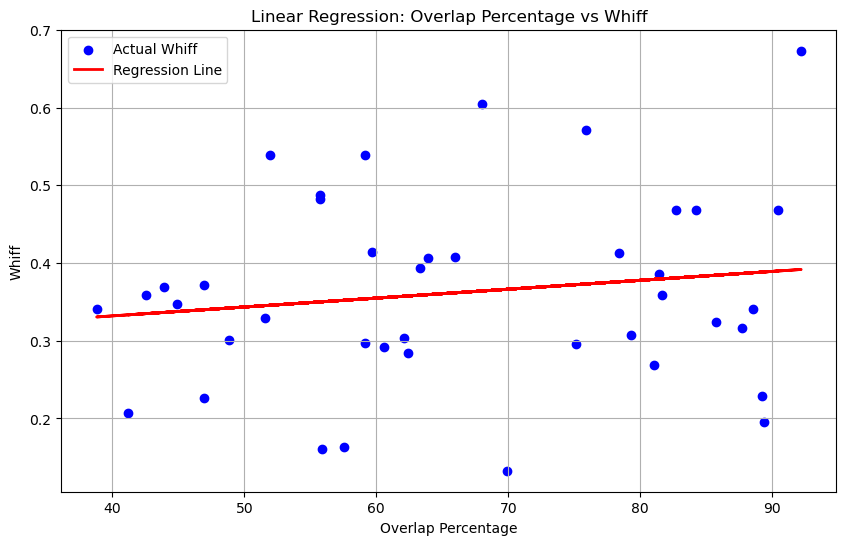

In [21]:
import pandas as pd
import numpy as np
from scipy.stats import gaussian_kde
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

%matplotlib inline

X = merged_results[['overlap_percentage']]
y = merged_results['Whiff']

model = LinearRegression()
model.fit(X, y)

# Predict values
merged_results['predicted_Whiff'] = model.predict(X)

# Plot the results using matplotlib
plt.figure(figsize=(10, 6))
plt.scatter(merged_results['overlap_percentage'], merged_results['Whiff'], color='blue', label='Actual Whiff')
plt.plot(merged_results['overlap_percentage'], merged_results['predicted_Whiff'], color='red', linewidth=2, label='Regression Line')
plt.xlabel('Overlap Percentage')
plt.ylabel('Whiff')
plt.title('Linear Regression: Overlap Percentage vs Whiff')
plt.legend()
plt.grid(True)
plt.show()

In [22]:
import pandas as pd
import numpy as np
from scipy.stats import gaussian_kde

# Ensure no missing values in the HRA columns of both datasets
filtered_ff_filtered_VRA = OAK_fastballs_filtered.dropna(subset=['VRA'])
filtered_cu_filtered_VRA = OAK_curveballs_filtered.dropna(subset=['VRA'])

# Function to calculate the percentage overlap between two distributions
def calculate_overlap(hra_ff, hra_sl):
    kde_ff = gaussian_kde(hra_ff, bw_method='scott')
    kde_sl = gaussian_kde(hra_sl, bw_method='scott')

    x_min = min(hra_ff.min(), hra_sl.min())
    x_max = max(hra_ff.max(), hra_sl.max())
    x_values = np.linspace(x_min, x_max, 1000)

    pdf_ff = kde_ff(x_values)
    pdf_sl = kde_sl(x_values)

    overlap = np.minimum(pdf_ff, pdf_sl)
    overlap_area = np.trapz(overlap, x_values)

    total_area_ff = np.trapz(pdf_ff, x_values)
    total_area_sl = np.trapz(pdf_sl, x_values)
    percentage_overlap = (overlap_area / min(total_area_ff, total_area_sl)) * 100

    return percentage_overlap

# Get unique players
unique_pitchers = set(filtered_ff_filtered_VRA['NamePlayer']).intersection(filtered_cu_filtered_VRA['NamePlayer'])

# Calculate overlap for each player
overlap_results = []

for player in unique_pitchers:
    hra_ff = filtered_ff_filtered_VRA[filtered_ff_filtered_VRA['NamePlayer'] == player]['VRA']
    hra_sl = filtered_cu_filtered_VRA[filtered_cu_filtered_VRA['NamePlayer'] == player]['VRA']
    
    if len(hra_ff) > 0 and len(hra_sl) > 0:
        overlap_percentage = calculate_overlap(hra_ff, hra_sl)
        overlap_results.append({'NamePlayer': player, 'overlap_percentage': overlap_percentage})

# Create a DataFrame with the results
overlap_df = pd.DataFrame(overlap_results)

# Order the results from highest to lowest overlap percentage
overlap_cb_sorted = overlap_df.sort_values(by='overlap_percentage', ascending=False)

# Display the sorted results
display(overlap_cb_sorted)

,NamePlayer,overlap_percentage
2,Zach Jackson,63.759086
20,Brandon Bielak,44.701808
16,Will Klein,42.953394
11,Tyler Baum,35.882963
15,Kyle Muller,35.869087
19,Brady Basso,33.173601
21,Luis Medina,28.661310
1,James Gonzalez,27.429820
18,Robert Dugger,26.083647
23,Colton Johnson,24.165577


In [23]:
import pandas as pd
import numpy as np
from scipy.stats import gaussian_kde

# Ensure no missing values in the HRA columns of both datasets
filtered_ff_filtered_HRA = OAK_fastballs_filtered.dropna(subset=['HRA'])
filtered_si_filtered_HRA = OAK_sinkers_filtered.dropna(subset=['HRA'])

# Function to calculate the percentage overlap between two distributions
def calculate_overlap(hra_ff, hra_sl):
    kde_ff = gaussian_kde(hra_ff, bw_method='scott')
    kde_sl = gaussian_kde(hra_sl, bw_method='scott')

    x_min = min(hra_ff.min(), hra_sl.min())
    x_max = max(hra_ff.max(), hra_sl.max())
    x_values = np.linspace(x_min, x_max, 1000)

    pdf_ff = kde_ff(x_values)
    pdf_sl = kde_sl(x_values)

    overlap = np.minimum(pdf_ff, pdf_sl)
    overlap_area = np.trapz(overlap, x_values)

    total_area_ff = np.trapz(pdf_ff, x_values)
    total_area_sl = np.trapz(pdf_sl, x_values)
    percentage_overlap = (overlap_area / min(total_area_ff, total_area_sl)) * 100

    return percentage_overlap

# Get unique players
unique_pitchers = set(filtered_ff_filtered_HRA['NamePlayer']).intersection(filtered_si_filtered_HRA['NamePlayer'])

# Calculate overlap for each player
overlap_results = []

for player in unique_pitchers:
    hra_ff = filtered_ff_filtered_HRA[filtered_ff_filtered_HRA['NamePlayer'] == player]['HRA']
    hra_sl = filtered_si_filtered_HRA[filtered_si_filtered_HRA['NamePlayer'] == player]['HRA']
    
    if len(hra_ff) > 0 and len(hra_sl) > 0:
        overlap_percentage = calculate_overlap(hra_ff, hra_sl)
        overlap_results.append({'NamePlayer': player, 'overlap_percentage': overlap_percentage})

# Create a DataFrame with the results
overlap_df = pd.DataFrame(overlap_results)

# Order the results from highest to lowest overlap percentage
overlap_si_sorted = overlap_df.sort_values(by='overlap_percentage', ascending=False)

# Display the sorted results
display(overlap_si_sorted)

,NamePlayer,overlap_percentage
9,J.T. Ginn,95.958073
17,Steven Echavarria,95.211147
11,Robert Dugger,93.076647
7,Wander Guante,93.071401
4,Osvaldo Bido,92.979216
1,Luis Carrasco,92.951638
15,Colton Johnson,92.184559
3,Michel Otañez,91.427121
6,Blaze Pontes,90.191861
2,James Gonzalez,89.609377


In [63]:
import pandas as pd
import numpy as np
from scipy.stats import gaussian_kde

# Ensure no missing values in the HRA columns of both datasets
filtered_si_filtered_HRA = OAK_sinkers_filtered.dropna(subset=['HRA'])
filtered_sl_filtered_HRA = OAK_sliders_filtered.dropna(subset=['HRA'])

# Function to calculate the percentage overlap between two distributions
def calculate_overlap(hra_ff, hra_sl):
    kde_ff = gaussian_kde(hra_ff, bw_method='scott')
    kde_sl = gaussian_kde(hra_sl, bw_method='scott')

    x_min = min(hra_ff.min(), hra_sl.min())
    x_max = max(hra_ff.max(), hra_sl.max())
    x_values = np.linspace(x_min, x_max, 1000)

    pdf_ff = kde_ff(x_values)
    pdf_sl = kde_sl(x_values)

    overlap = np.minimum(pdf_ff, pdf_sl)
    overlap_area = np.trapz(overlap, x_values)

    total_area_ff = np.trapz(pdf_ff, x_values)
    total_area_sl = np.trapz(pdf_sl, x_values)
    percentage_overlap = (overlap_area / min(total_area_ff, total_area_sl)) * 100

    return percentage_overlap

# Get unique players
unique_pitchers = set(filtered_si_filtered_HRA['NamePlayer']).intersection(filtered_sl_filtered_HRA['NamePlayer'])

# Calculate overlap for each player
overlap_results = []

for player in unique_pitchers:
    hra_ff = filtered_si_filtered_HRA[filtered_si_filtered_HRA['NamePlayer'] == player]['HRA']
    hra_sl = filtered_sl_filtered_HRA[filtered_sl_filtered_HRA['NamePlayer'] == player]['HRA']
    
    if len(hra_ff) > 0 and len(hra_sl) > 0:
        overlap_percentage = calculate_overlap(hra_ff, hra_sl)
        overlap_results.append({'NamePlayer': player, 'overlap_percentage': overlap_percentage})

# Create a DataFrame with the results
overlap_df = pd.DataFrame(overlap_results)

# Order the results from highest to lowest overlap percentage
overlap_si_sl_sorted = overlap_df.sort_values(by='overlap_percentage', ascending=False)

# Display the sorted results
display(overlap_si_sl_sorted)

,NamePlayer,overlap_percentage
19,Royber Salinas,84.191008
12,J.T. Ginn,82.474207
15,Robert Dugger,79.490933
22,Aaron Brooks,73.936993
6,Scott Alexander,68.133430
14,Jake Garland,67.672228
17,Luis Medina,67.169921
3,Osvaldo Bido,59.884433
8,Blaze Pontes,56.175977
1,Luis Carrasco,55.922166
